## Optimal transport of simple histograms

In this simple example, we'll generate some 1d histograms and propagate one to the other via optimal transport.

In [4]:
import numpy as np
import torch
from geomloss import SamplesLoss
import matplotlib.pyplot as plt

In [63]:
def display_helper(ax,x0,x1):
    x0_ = x0.detach().numpy()
    x1_ = x1.detach().numpy()
    ax.hist(np.c_[x0_,x1_],bins=50);
    ax.set_xlim(left=-3,right=20)

In [71]:
x0 = torch.randn(100,1,requires_grad=True)
x1 = torch.randn(100,1) + 15

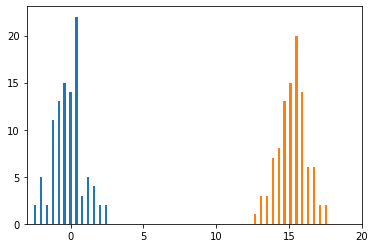

In [72]:
fig,ax=plt.subplots(1,1)
display_helper(ax,x0,x1)

In [73]:
lr = 1
loss = SamplesLoss(loss='sinkhorn',p=2)
niter = 1000

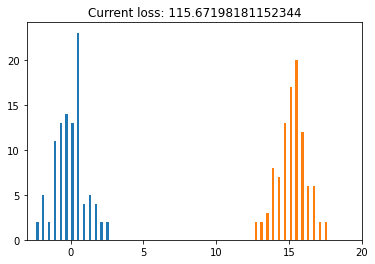

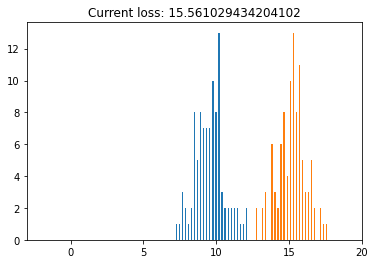

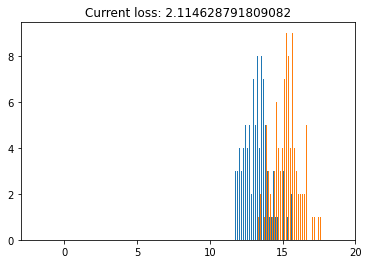

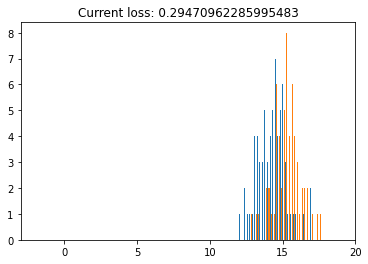

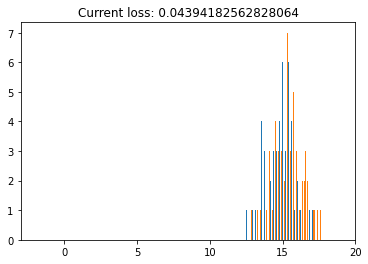

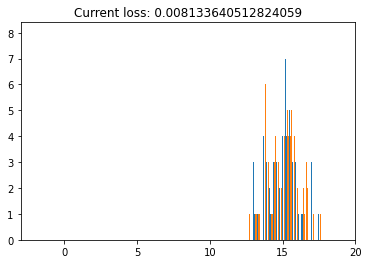

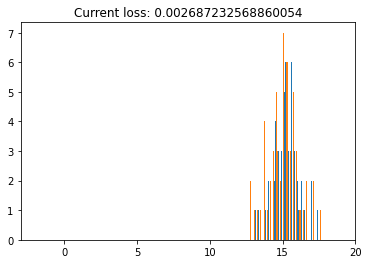

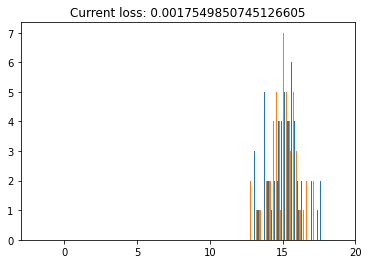

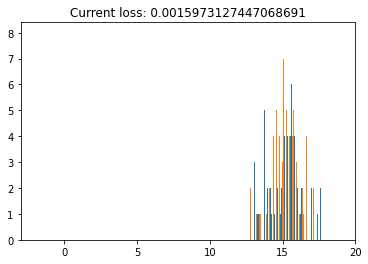

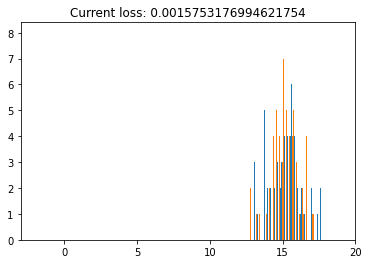

In [74]:
for i in range(niter):
    L = loss(x0,x1)
    [g] = torch.autograd.grad(L,x0)
    x0.data -= lr*g
    
    if (i%100)==0:
        fig,ax=plt.subplots(1,1)
        display_helper(ax,x0,x1)
        ax.set_title(f"Current loss: {L.item()}")
    